## **케라스 함수형 API**

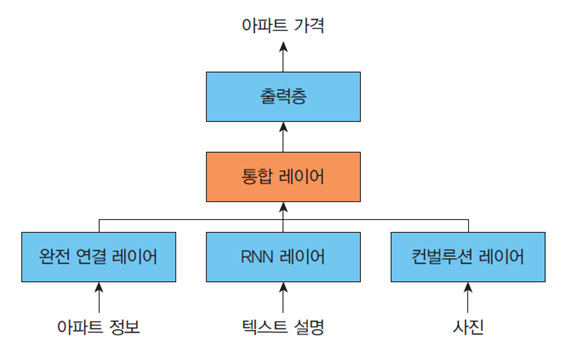

### **준비 사항: 패키지 불러오기**

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import numpy as np

### **데이터셋 불러오기 및 데이터셋 탐색**

MNIST 데이터베이스 (Modified National Institute of Standards and Technology database): 손으로 쓴 숫자들로 이루어진 대형 데이터베이스

In [12]:
(X_train, _), (X_test, _) = mnist.load_data()

In [13]:
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255

In [4]:
#X_train, X_test =X_train/255, X_test/255 

In [5]:
# model = Sequential()
# model.add(Dense(784, input_dim=28*28, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(784, activation='sigmoid'))

In [ ]:
# tmp = method()
# tmp()
# method()()

In [21]:
inputs = keras.Input(shape=(784,))
encoded =layers.Dense(32, activation='relu')(inputs)
latent_space = layers.Dense(32, activation='relu')(encoded)
decoded =layers.Dense(784, activation='sigmoid')(encoded)

latent = Model(inputs = inputs, outputs = latent_space)
model = Model(inputs=inputs, outputs=decoded)

In [22]:
model.compile(optimizer=keras.optimizers.Adam(), loss= keras.losses.MeanSquaredError()) #'adam'

In [23]:
history = model.fit(X_train, X_train, epochs=10, batch_size=256, verbose=1, shuffle=True,)

Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0712
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0359
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0266
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0214
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0182
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0160
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0143
Epoch 8/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0131
Epoch 9/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0122
Epoch 10/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0116


### **Generative Images**

In [29]:
latent_img = latent.predict(X_test)

313/313 [==============================] - 0s 1ms/step


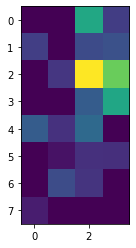

In [35]:
plt.imshow(latent_img[0].reshape(8, 4))

313/313 [==============================] - 0s 1ms/step


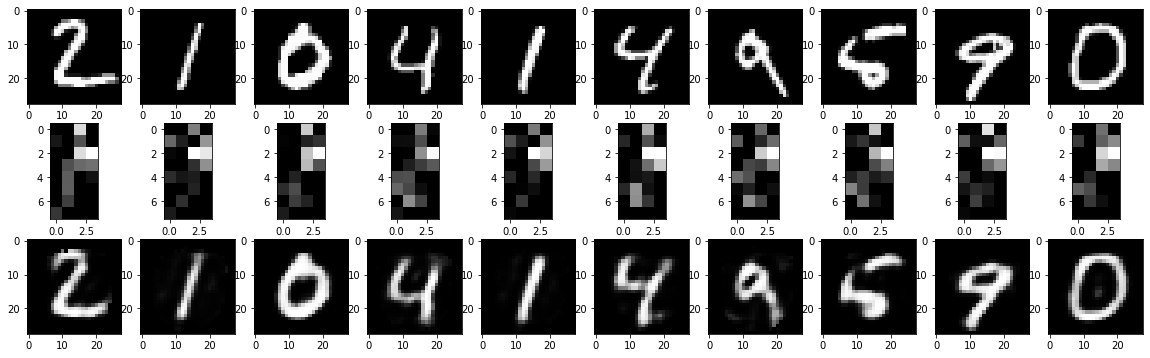

In [36]:
import matplotlib.pyplot as plt

decoded_imgs = model.predict(X_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n+1):
  ax = plt.subplot(3, n, i)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')

  ax = plt.subplot(3, n, i+n)
  plt.imshow(latent_img[i].reshape(8, 4), cmap='gray')

  ax = plt.subplot(3, n, i+n*2)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')

plt.show()